#### Import

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Plt Set

In [15]:
# 設定風格
plt.style.use('seaborn-v0_8-paper')  # 或 'ggplot', 'seaborn-ticks', 'classic'

plt.rc('font', family='MingLiU', size=12)  # 字體及大小
plt.rc('axes', titlesize=14)                      # 圖表標題字體大小
plt.rc('axes', labelsize=12)                      # 軸標籤字體大小
plt.rc('xtick', labelsize=10)                     # X 軸刻度字體大小
plt.rc('ytick', labelsize=10)                     # Y 軸刻度字體大小

# 設定圖尺寸 (單位為英寸) 和 DPI
plt.figure(figsize=(6, 4), dpi=300)

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

#### Read Data

In [8]:
folder = r"C:\Users\happp\Documents\2024_ScienceFair_Mirror"

In [9]:
data = pd.read_csv(os.path.join(folder, r"exp_data.csv"))

#### Define Function

In [13]:
def makePltTable(
        title="標題", 
        xlabel="X 軸", 
        ylabel="Y 軸"
    ):

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  # 使用虛線網格

    plt.tick_params(axis='both', direction='in', length=6, width=1)  # 刻度向內

    plt.legend(loc='best', fontsize=10, frameon=False)  # 最佳位置，去掉邊框

#### Example

C:\Users\happp\AppData\Local\Temp\ipykernel_5620\3962360219.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best', fontsize=10, frameon=False)  # 最佳位置，去掉邊框


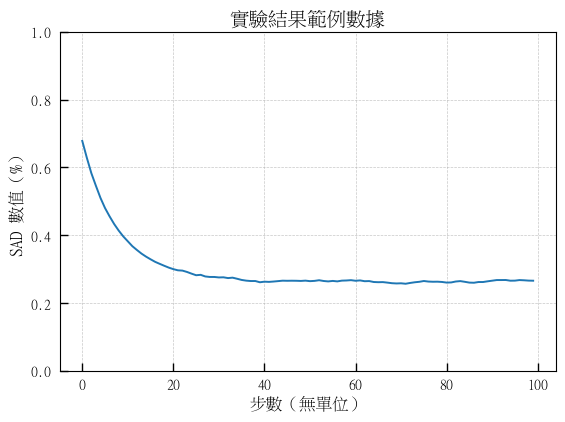

In [20]:
# 範例數據
y = data[str(1)].values  # y 軸數據
x = range(len(y))  # x 軸數據

plt.plot(x, y)

plt.ylim(0, 1)

makePltTable(
    
    "實驗結果範例數據", 
    "步數（無單位）", 
    "SAD 數值（%）"
)

plt.savefig(
    os.path.join(folder, "output.png"), 
    dpi=300, bbox_inches='tight'
)  # 儲存為 PNG 格式

plt.show()

C:\Users\happp\AppData\Local\Temp\ipykernel_5620\3962360219.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best', fontsize=10, frameon=False)  # 最佳位置，去掉邊框


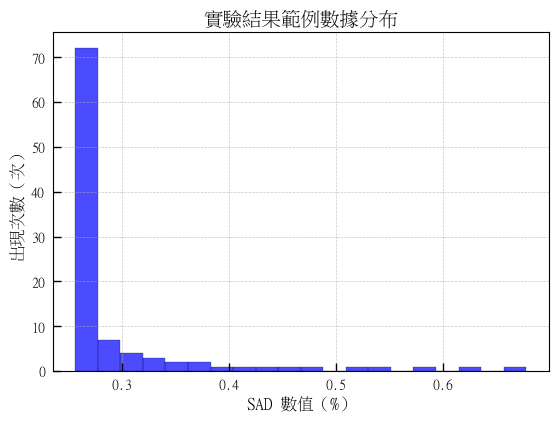

In [22]:
d = data[str(1)].values

plt.hist(d, bins=20, color='blue', alpha=0.7, edgecolor='black')

makePltTable(
    
    "實驗結果範例數據分布", 
    "SAD 數值（%）", 
    "出現次數（次）" 
)

plt.savefig(
    os.path.join(folder, "output.png"), 
    dpi=300, bbox_inches='tight'
)  # 儲存為 PNG 格式

plt.show()

#### Other

C:\Users\happp\AppData\Local\Temp\ipykernel_6108\4191250840.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


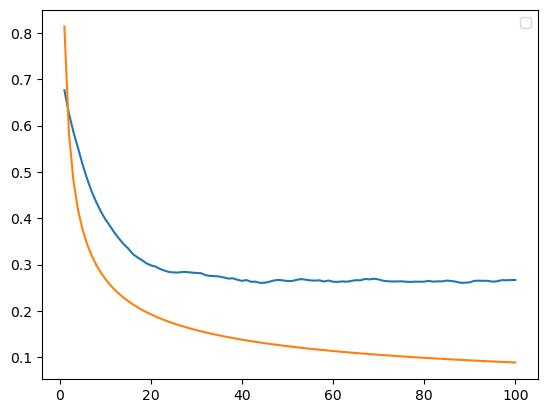

In [60]:
for i in range(1):

    y = data[str(i+1)].values  # y 軸數據
    x = np.array(range(1, len(y)+1))  # x 軸數據

    log_x = np.log(x)
    log_y = np.log(y)

    # plt.plot(log_x, log_y)

    a, b = np.polyfit(log_x, log_y, 1)

    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = np.exp(a) * x_fit ** b

    plt.plot(x, y)
    plt.plot(x_fit, y_fit)

plt.legend()
# plt.ylim(0, 1)
plt.show()

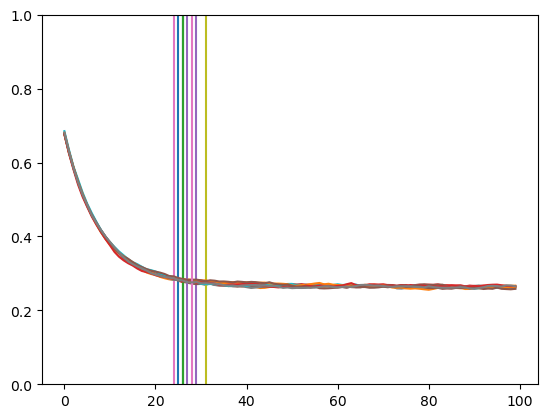

In [7]:
for i in range(9):

    # 範例數據
    y = data[str(i+1)].values  # y 軸數據
    # y = moving_average(y, window_size=5)
    
    x = range(len(y))  # x 軸數據
    dy_dx = np.diff(y) / np.diff(x)

    # 找到斜率第一次小於 0 的位置
    first_negative_slope_index = np.where(dy_dx >= 0)[0][0] if np.any(dy_dx < 0) else None

    plt.plot([first_negative_slope_index]*2, [0, 1])
    plt.plot(x, y)

plt.ylim(0, 1)
plt.show()

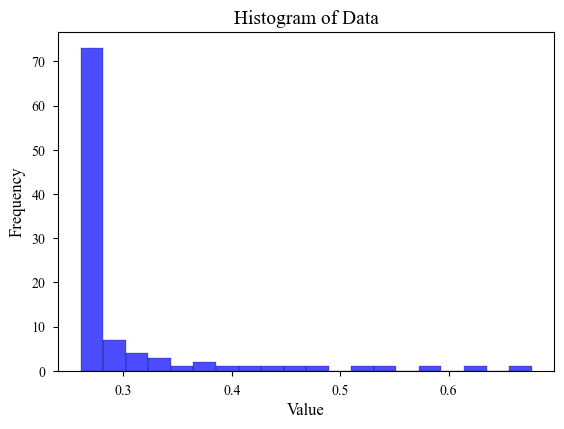

In [93]:
d = data[str(2)].values
plt.hist(d, bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

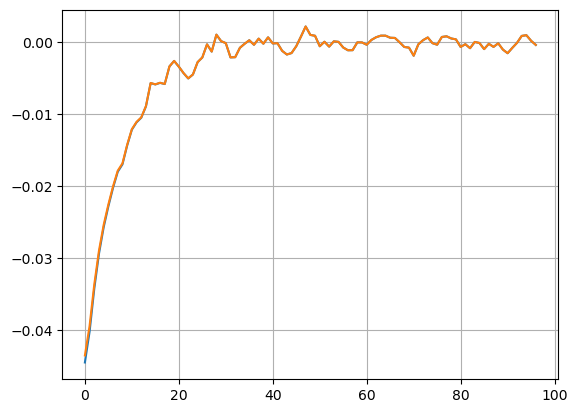

In [74]:

# 範例數據
y = data[str(2)].values  # y 軸數據
# y = moving_average(y)
x = np.array(range(len(y)))  # x 軸數據

# 計算一階導數 (dy/dx)
dy_dx = np.diff(y) / np.diff(x)

dy_dx += 1

dy_dx = moving_average(dy_dx)

# 將導數與中點對應
x_mid = range(len(dy_dx))

plt.plot(x_mid, np.log(dy_dx))
plt.plot(x_mid, dy_dx-1)

# plt.ylim(-0.02, 0.005)
plt.grid()
plt.show()